<a href="https://colab.research.google.com/github/saif2544/ML-project-3/blob/main/lab%20project%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment name:** solving a real world problem using neural network.

**ID No.: 1608002**

**Objective:**

1. To classify a real world problem using neural network.

**Procedure:**

Here, at first data set was taken. The string type data are changed to numerical values by one hot encoding technique.Then feature and target dataset was selected and separated. After that data set were separated in the trained and tested set. after implementing the classification algorithm,Then accurecy was checked.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 16:55:18--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 16:55:19--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15b026cbed302082fd8222fce6.dl.dropboxusercontent.com/cd/0/inline/BcMYjK1MkJk4xvY5bNC86SD4UD66iDJmLHdtfqdbNXvl5iHVz4zlgQ12PQx7O3G70VvEpBpiEnNY2ClVE2vYSWkM1la1OHJnN5EYU3lAS3eVGMcPh9zwdVIynwAh1JlO57AIHCQQgLMN9VGt8W1Y5fo1/file# [following]
--2021-12-20 16:55:19--  https://uc15b026cbed302082fd8222fce6.dl.dropboxusercontent.com/cd/0/inline/BcMYjK1MkJk4xvY5bNC86SD4UD66iDJmLHdtfqdbNXvl5iHVz4zlgQ12PQx7O3G70VvEpBpiEnNY2ClVE2vYS

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print(dataset[pd.isnull(dataset.Pregnancies)])
print(dataset[pd.isnull(dataset.Glucose)])
print(dataset[pd.isnull(dataset.BloodPressure)])
print(dataset[pd.isnull(dataset.SkinThickness)])
print(dataset[pd.isnull(dataset.Insulin)])
print(dataset[pd.isnull(dataset.BMI)])
print(dataset[pd.isnull(dataset.DiabetesPedigreeFunction)])
print(dataset[pd.isnull(dataset.Age)])
print(dataset[pd.isnull(dataset.Outcome)])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Empty 

In [ ]:
feature = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = dataset[['Outcome']] 

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [ ]:
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 0.7274 - accuracy: 0.4094 - val_loss: 0.7126 - val_accuracy: 0.5968
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6159 - val_loss: 0.6488 - val_accuracy: 0.7097
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6594 - val_loss: 0.6054 - val_accuracy: 0.7258
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.6812 - val_loss: 0.5723 - val_accuracy: 0.7258
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.6975 - val_loss: 0.5481 - val_accuracy: 0.7097
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.7138 - val_loss: 0.5314 - val_accuracy: 0.7097
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.7446 - val_loss: 0.5187 - val_accuracy: 0.7419
Epoch 8/100


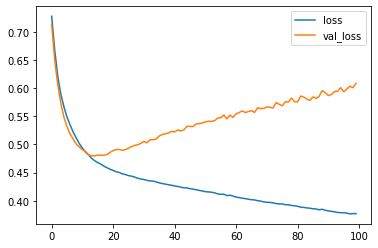

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

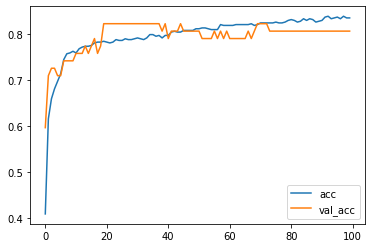

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
pred = y_pred.astype('uint8')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



**Final Results:**

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.64      0.60      0.62        47

    accuracy
                               0.77       154
   macro avg
   
          0.73      0.72      0.73       154
weighted avg

       0.77      0.77      0.77       154

**Conclusion:**

in this experiment, operations were carried out such as fit transform, train and test set separation etc. After the machine learning model was built various performance parameters such as precision,recall,f1-score,support, accuracy,weighted avg.and macro avg.were calculated to measure the efficiency of the system.some error was found because of solving the problem.